# Location with high chance for investment
### Locations -  Bangalore, Mumbai, NCR(Gurgaon, Noida, Delhi) 

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import csv

Bangalore 412
Mumbai 303
New Delhi 215
Gurgaon 166
Noida 46


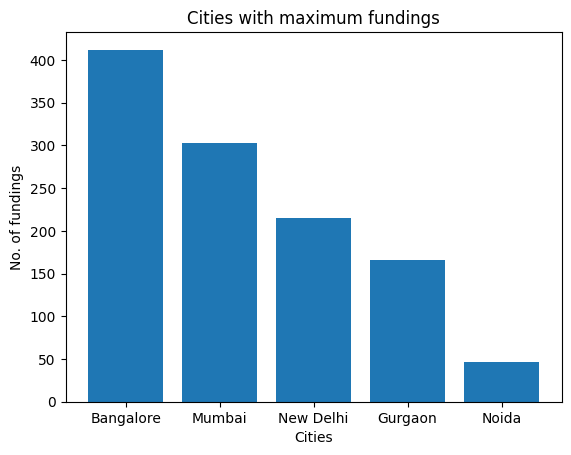

In [83]:
data = pd.read_csv('startup_funding.csv')
data.dropna(subset = "CityLocation", inplace = True)
def seperateCity(city) :
    return city.split('/')[0].strip()
data.CityLocation = data.CityLocation.apply(seperateCity)
data.CityLocation.replace('bangalore', 'Bangalore', inplace = True)
data.CityLocation.replace('Delhi', 'New Delhi', inplace = True)
data = data[(data.CityLocation == 'Bangalore') | (data.CityLocation == 'New Delhi') | (data.CityLocation == 'Mumbai') | (data.CityLocation == 'Noida') | (data.CityLocation == 'Gurgaon')]
data.AmountInUSD = data.AmountInUSD.apply(lambda x : float(str(x).replace(",","")))
data = data.groupby('CityLocation')['AmountInUSD'].count()
data = data.sort_values(ascending=False)
cities = data.index
counts = data.values
for i in range(5):
    print(cities[i], counts[i])
plt.bar(cities, counts)
plt.xlabel('Cities')
plt.ylabel('No. of fundings')
plt.title('Cities with maximum fundings')
plt.show()

# Top 5 investors

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


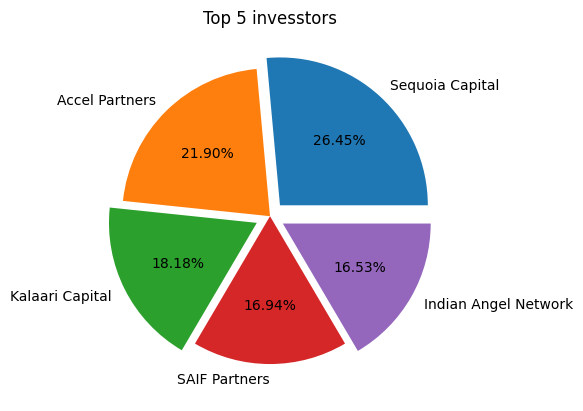

In [84]:
data = pd.read_csv("startup_funding.csv")
data = data.dropna(subset = ["InvestorsName"])
data = data[data.InvestorsName != 'Undisclosed Investors']
data = data[data.InvestorsName != 'Undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investors']
data = data[data.InvestorsName != 'undisclosed investor']
investors = []
for row in data.InvestorsName:
    if row != "":
        temp = row.split(",")
        for j in temp:
            investors.append(j.strip())
investors_dict={}
for i in investors:
    if i in investors_dict:
        investors_dict[i] += 1
    else:
        investors_dict[i] = 1
investors_dict = collections.OrderedDict(investors_dict.items())
investors_dict
x=[]
y=[]
for i in investors_dict.keys():
    x.append(i)
    y.append(investors_dict[i])
np_x = np.array(x)
np_y = np.array(y)
np_x = np_x[np.argsort(np_y)]
np_y = np.sort(np_y)

np_y = np_y[::-1]
np_x = np_x[::-1]
graph = []
labels = []
for i in range(5):
    print(np_x[i], np_y[i])
    graph.append(np_y[i])
    labels.append(np_x[i])
plt.pie(graph, explode = (0.1, 0, 0.1, 0, 0.1), labels=labels, autopct='%0.2f%%')
plt.title('Top 5 invesstors')
plt.show()